# Exploratory Data Analysis

This exploratory data analysis (EDA) project uses data on [Seattle home prices](https://www.kaggle.com/harlfoxem/housesalesprediction), along with the `Pandas` and `Seaborn` packages.

### What is exploratory data analysis (EDA) and why is it important

The first step in a data analytics workflow is asking the right question. The second step is EDA, or exploratory data analysis. The EDA step comes before we run predictive models, such as linear regression. 

EDA's goal is to uncover patterns or trends in the data that can lead us to hypotheses or to further data collection. There is not one prescribed way to undertake EDA, and so it is part science but also part art. Data summaries, such as min and max, and visualizations such as heatmaps are fundamental tools in the EDA toolbox. 

### 1. Setting up our environment by importing the necessary libraries

For this task, I will be using `Pandas` and `Seaborn`

In [ ]:
conda install -c conda-forge nbconvert-webpdf

In [1]:
# import pandas and seaborn 

import pandas as pd
import seaborn as sns

### 2. Read in the dataset using `Pandas`

The workhorse of the `Pandas` library is the `dataframe`.

In [2]:
# read in the seattle housing dataset

housing_data = pd.read_csv('kc_house_data.csv')

Examine the first few rows of the dataframe with `df.head()`. To do this, you'll want to start with your dataframe, then use the dot operator to call the `head()` function. As input, `head()` takes in an integer and will return that many rows back to you. Call `head()` with an input of `7` to see the first 7 rows. 

In [3]:
# head

housing_data.head(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [4]:
# sample

housing_data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15803,1703400470,20141219T000000,375000.0,2,1.00,980,3915,1.0,0,0,...,7,980,0,1919,0,98118,47.5589,-122.290,1425,1576
13410,6163901033,20140902T000000,269000.0,2,1.00,770,8612,1.0,0,0,...,6,770,0,1953,0,98155,47.7547,-122.323,1290,8407
10535,3650100105,20140926T000000,392500.0,2,1.00,1050,4125,1.0,0,0,...,7,1050,0,1909,0,98144,47.5736,-122.307,1650,4125
9744,5416500520,20140825T000000,300000.0,3,2.50,1750,4200,2.0,0,0,...,7,1750,0,2005,0,98038,47.3605,-122.040,1890,4048
9794,3760500240,20150512T000000,435000.0,2,0.75,750,16321,1.0,0,1,...,4,750,0,1936,0,98034,47.6985,-122.229,3020,10625


In [5]:
# list column names

housing_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 3. Examine the summary statistics of the numeric fields (columns)

`Pandas` makes that really easy with the `describe()` function.
One of the first steps I always take in EDA is to look at the summary statistics, such as min/max/percentiles, of each numeric column in the data. 

In [6]:
# describe()

housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


`housing_data.describe()` shows the output of statistical results including count, mean, std, min, max, 25%, 50%, 75% of each column in the dataset.

### 4. Get some info on all the columns in the data

Another useful `function` we can apply to a dataframe is `.info()`

In [7]:
# <to-do> call .info()

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

`housing_data.info()` returns the list of column names along with the number of values and data types of each column, and whether that column is null or not. It also returns the number of data types for each type and memory usage of the dataset.

Most of the columns in the dataset have integer data types. There is no column having null values.

### 5. Rename a column in the dataframe

In [11]:
# rename

housing_data.rename(columns = {'price' : 'sold_price'}, inplace = True)

# check whether it worked
housing_data.head()

,id,date,sold_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 6. Count how many 2, 3, 4-bedroom houses are in the dataset

Are most houses in Seattle 2, 3, 4 or more bedrooms?

In [10]:
# counts of the bedrooms column
housing_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

**Most houses in Seattle have between 3 and 4 bedrooms. 3-bedroom houses account for the highest number, with 9824 houses. Meanwhile, there are fewer than 10 houses with more than 9 bedrooms in Seattle. Only one house has 11 bedrooms and 33 bedrooms respectively.**

### 7. Plot a bar chart of the number of bedrooms in Seattle homes

While we'll do most of our heavy charting in `seaborn`, `Pandas` does have some built-in charting capabilities that are very convenient during EDA. Let's plot a bar chart using the data from the prior section: the number of homes with 2, 3, 4, etc bedrooms.

<AxesSubplot:>

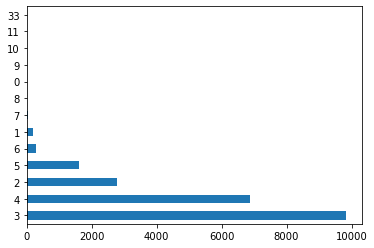

In [8]:
# create a horizontal bar chart of value counts

housing_data['bedrooms'].value_counts().plot(kind='barh')

### 8. Mean number of bedrooms

We've seen the bar chart of number of bedrooms, but what's the mean in all the data? Although we already found it earlier using `describe()`, if we want to see the mean of a single column, we can call `mean()` directly on that column, like this: 

`dataframe['column_name'].mean()`

In [12]:
# mean of bedrooms 

housing_data['bedrooms'].mean()

3.37084162309721

### 9. Subsetting and selecting rows

Perhaps we're interested only in the data for houses with 4 or fewer bedrooms. Perhaps homes with 5 or more bedrooms are quite different and we're more interested in more typical homes. Can we create a copy of the dataset with only homes with fewer than 5 bedrooms? We can use filtering to do this.

In [14]:
# filter on bedrooms < 5 and write a few sentences on what the output looks like

housing_data['bedrooms'] < 10

0        True
1        True
2        True
3        True
4        True
         ... 
21608    True
21609    True
21610    True
21611    True
21612    True
Name: bedrooms, Length: 21613, dtype: bool

The output displays a column number and a column of data type True only


Filtering returned to us a column of true/falses. We can use this to create a new dataset that's a subset of the original by passing in the column of true/false to the original dataset. `Pandas` will know to return to us only the columns that align with True! This is pretty cool, try it yourself. It'll be something like this: 

`new_dataframe = old_dataframe[ dataframe['column_name'] < 5 ]`

In [15]:
# create subset dataframe
housing_data2 = housing_data[housing_data['bedrooms'] < 5]

In [17]:
# sample on new dataframe 
housing_data2.sample(10)

,id,date,sold_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6232,6412600005,20141003T000000,375000.0,4,1.50,1430,7232,1.5,0,0,...,7,1430,0,1948,0,98125,47.7197,-122.328,1540,7232
518,4386700135,20141114T000000,2250000.0,4,2.25,4760,8036,2.5,0,0,...,9,3390,1370,1916,0,98112,47.6415,-122.285,2950,9323
1428,2481630070,20150128T000000,914600.0,4,3.00,3180,80837,2.0,0,0,...,11,3180,0,1985,0,98072,47.7336,-122.134,3180,38715
16716,1788800080,20140730T000000,184900.0,3,1.00,1040,10080,1.0,0,0,...,6,1040,0,1959,0,98023,47.3290,-122.343,1000,8736
18632,7960100220,20150416T000000,710000.0,4,2.75,2460,3600,2.0,0,0,...,8,1640,820,1907,2007,98122,47.6093,-122.297,1890,3600
10492,739500270,20141113T000000,227950.0,3,1.50,1120,11430,1.0,0,0,...,7,1120,0,1963,0,98031,47.4105,-122.194,1790,8760
4539,3223069118,20140616T000000,554000.0,3,3.50,3380,108900,2.0,0,0,...,9,2700,680,1999,0,98058,47.4316,-122.075,2250,130680
11100,1912100885,20140702T000000,690000.0,3,1.50,1760,4000,2.0,0,0,...,8,1760,0,1922,0,98102,47.6401,-122.320,1760,4000
13426,7533800325,20140520T000000,1100000.0,3,2.00,2390,6888,2.0,0,1,...,8,2390,0,1939,0,98115,47.6839,-122.274,2390,7920
10395,1522700060,20140624T000000,518000.0,4,2.75,2520,14021,2.0,0,0,...,9,2520,0,1999,0,98019,47.7344,-121.957,2330,14007


### 10. Filter on multiple criteria

In [18]:
# mulitple filtering
housing_data2 = housing_data[ (housing_data['floors'] > 2) & (housing_data['sqft_living'] > 5000) ]
housing_data2

,id,date,sold_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
577,1526069135,20141211T000000,930000.0,4,4.00,6050,84942,2.5,0,2,...,9,4150,1900,2009,0,98077,47.7466,-122.029,2700,199504
1848,3271800295,20150203T000000,1569500.0,5,4.50,5620,5800,3.0,0,3,...,11,4700,920,1999,0,98199,47.6482,-122.412,2360,5800
2444,7524900003,20141210T000000,3278000.0,2,1.75,6840,10000,2.5,1,4,...,11,4350,2490,2001,0,98008,47.6042,-122.112,3120,12300
3519,5700003640,20140519T000000,2095000.0,5,3.75,5340,10655,2.5,0,3,...,10,3740,1600,1912,0,98144,47.5795,-122.285,3910,9418
3708,822069112,20150423T000000,1350000.0,4,4.75,5230,89298,2.5,0,0,...,11,5230,0,2002,0,98038,47.4097,-122.063,4110,107153
4811,9831200500,20150304T000000,2479000.0,5,3.75,6810,7500,2.5,0,0,...,13,6110,700,1922,0,98102,47.6285,-122.322,2660,7500
5967,5249800010,20141203T000000,2725000.0,4,4.25,6410,43838,2.5,0,2,...,12,5610,800,1906,0,98144,47.5703,-122.280,2270,6630
7191,7159200005,20140507T000000,3200000.0,7,4.50,6210,8856,2.5,0,2,...,11,4760,1450,1910,0,98109,47.6307,-122.354,2940,5400
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
7907,1068000375,20140923T000000,3200000.0,6,5.00,7100,18200,2.5,0,0,...,13,5240,1860,1933,2002,98199,47.6427,-122.408,3130,6477


### 11. Find null values for price_sold

Are there any houses where the sold price is null?

In [19]:
# find null price_sold (there might be none!)
housing_data[housing_data['sold_price'].isnull()]

,id,date,sold_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No houses have null sold price.

### 12. Groupby and applying a function

Perhaps we want to know a statistic, such as mean, but grouped by some criteria. For example, what's the mean number of bathrooms if we group by number of bedrooms? What's the mean price if we group by number of bedrooms? The result will be a statistic (such as mean) for each group. So if we group by number of bedrooms, we'll get a mean sale price for 2-bedroom homes, a mean sale price for 3-bedroom homes, etc.

In [20]:
# sum of all columns, grouped by number of bedrooms
housing_data.groupby(['bedrooms']).sum()

,id,sold_price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,,,,,,,,,
0,60226897948,5.323550e+06,10.75,22202,313837,25.5,0,4,37,87,22202,0,25790,0,1274867,617.6484,-1587.953,26480,339262
1,824506852389,6.321093e+07,212.25,176038,3240849,229.0,5,49,650,1214,163948,12090,386590,33758,19522580,9465.8666,-24329.114,288464,2833804
2,12796737512476,1.107789e+09,3868.75,3421718,33386964,3606.5,31,493,9323,18966,3055985,365733,5396940,224616,270772432,131344.5378,-337488.853,4150448,26752981
3,44560526021645,4.580264e+09,19337.50,17740545,141610899,14239.0,64,1845,33554,73410,15565561,2174984,19371087,746638,963503322,467145.7247,-1200623.894,18031397,125838992
4,32059593435370,4.372957e+09,16767.50,17581099,115072500,11122.0,40,1845,23444,55859,15128705,2452394,13602925,599508,674916014,327281.2046,-840905.652,15767521,94470976
5,7232017347343,1.259346e+09,4448.50,4879120,26847205,2529.0,19,656,5522,13244,3854514,1024606,3160702,161800,157010371,76166.2450,-195644.188,3910773,20956244
6,1194547821962,2.245416e+08,834.50,893341,5055645,437.0,4,148,944,2198,678473,214868,533946,45852,26677614,12941.8745,-33249.478,620208,4013871
7,153031722702,3.614502e+07,138.75,151020,791941,65.5,0,19,131,321,120090,30930,74588,8005,3727261,1809.1429,-4645.147,88740,600829
8,60894204007,1.436600e+07,46.25,49400,116631,22.0,0,3,46,105,34590,14810,25432,0,1275064,619.1901,-1589.494,29450,95627


### 13. Pair plots

So far we've explored the data by creating more data, such as summary statistics. Let's try our hand at visualization. 

We'll be using the plotting library `Seaborn`, specifically its ability to create super quick and easy pair plots. A pair plot is a matrix of all of our numeric columns against each other. Every row/column in the matrix is a scatter plot of one variable against another. Along the diagonal, where the row and column are the same variable, we will see a histogram of that variable. We already imported `Seaborn` as sns above. To get a pairplot, we need to do this: 

`sns.pairplot(dataframe_name)`

But hold on! We don't want every column that's current in our data. For example, it doesn't make sense to include `id`. So let's create a new copy of our dataframe that includes only a few of the fields. To do this: 

`new_df = dataframe[['column_a','column_b','column_c']]`

Note the use of double `[[` -- this is because we're passing in a list (the inner set of `[]`) to our dataframe (outter set of `[]`). 

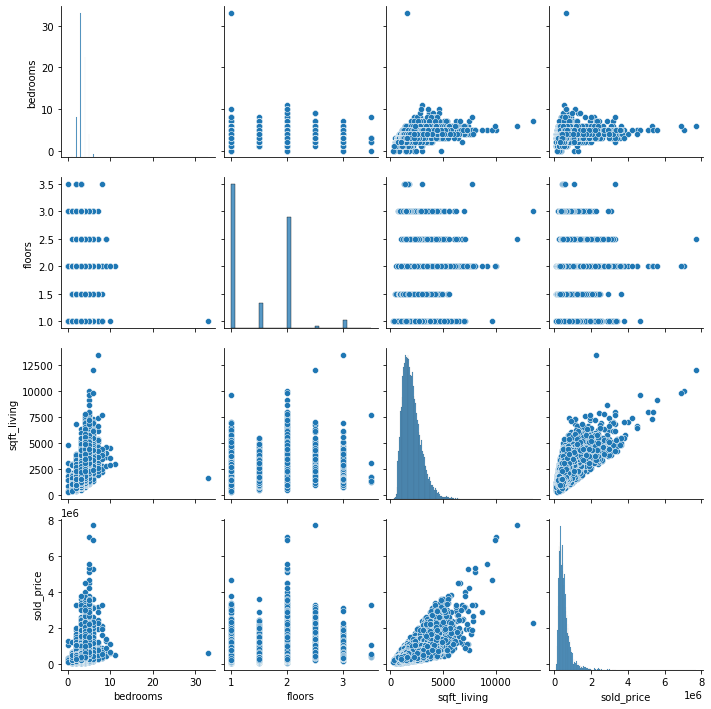

In [21]:
# select only a few meaningful columns and save to new smaller dataframe
housing_data3 = housing_data[['bedrooms','floors','sqft_living','sold_price']]
housing_data3

# seaborn pairplot on the new, smaller dataframe
sns.pairplot(housing_data3)

**Pair plot is used to understand the relationship between variables in the dataset. Pair plot also displays different types of chart like histogram and scatterplot in this case. Histogram shows the distribution of one single variable while scatterplot shows the relationship between two variables (e.g. positive relationship between sqft_living and sold_price)**

### 14. Seaborn correlation heatmap

The other viz common in EDA is a correlation heatmap. Correlation tells us how much two variables move in the same direction (or not). Correlation is measured for each pair of columns/fields. You can put this information in a table. But a table of correlations has a lot of numbers and can be hard to interpret, which is why a heatmap is commonly used. The heatmap just turns the numbers in a correlation table into colors, so that we can more quickly spot fields/columns that are highly correlated. High (or low) correlation will be important to us in a few weeks when we build models.

<AxesSubplot:>

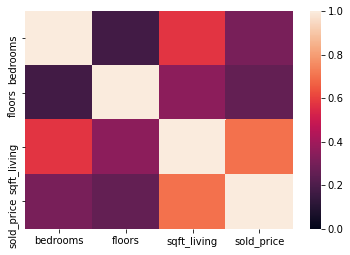

In [94]:
# heatmap on smaller dataframe
#cor = housing_data3.corr()
#cor
sns.heatmap(housing_data3.corr(), vmin=0, vmax=1)

### 15. What did we find out about our data? 
Write a few sentences about what you learned about home prices in Seattle using this EDA! Include what other measures, metrics, visualizations, etc you would want to see as part of an EDA of this data. 

- There are 21613 rows (houses in Seattle) and 21 columns (data about houses) in this Seattle housing dataset.
- Most houses in Seattle have between 3 and 4 bedrooms. 3-bedroom houses account for the highest number, with 9824 houses; and the number of 4-bedroom houses is the second highest with 6882 houses. Meanwhile, there are fewer than 10 houses with over 9 bedrooms in Seattle.
- The average sold price of houses in Seattle is around 54,000 dollars. The highest sold price is 7.7 million dollars.
- There are 23 houses in Seattle which have more than 2 floors and living space over 5000 sqft, with the minimum sold price of 930K dollars.
- There is a positive linear relationship between area of living (sqft) and sold price (dollars); Sold prices increases as the living area increases.
- If possible, the availability and quantity of furniture and house conditions should also be included in this dataset, since those factors can affect the sold price of houses.